In [1]:
from utils.training_io import load_log
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
results_dir = "imdb_runs_results"

seeds = [22, 32, 120]
use_nb = ["nb", "full"]
logs = []
for seed in seeds:
    for nb_f in use_nb:
        if nb_f == "full":
            path = os.path.join(results_dir, f"imdb_log_{nb_f}_1e-03_seed{seed}.txt")
        elif nb_f == "nb":
            path = os.path.join(results_dir, f"imdb_log_{nb_f}_1e-03_seed{seed}.txt")
        log = load_log(path)
        log["seed"] = seed
        log["type"] = "Vanilla" if nb_f=="full" else "NB Sub-Sampling"
        logs.append(log)
df = pd.concat(logs)


In [3]:
df["nsteps"] = df.eval("epoch * mean_ngram_count")

In [4]:
df.head()

,epoch,mean_dv_norm,mean_grad_norm,mean_ngram_count,mean_loss,C,dev_acc,test_acc,seed,type,nsteps
0,0.0,0.680675,10.074027,256.0,2.636044,1.0,67.18,67.028,22,NB Sub-Sampling,0.0
1,1.0,0.689912,6.814611,256.0,2.373941,10.0,80.20,80.352,22,NB Sub-Sampling,256.0
2,2.0,0.698150,6.495781,256.0,2.276125,1.0,85.30,85.532,22,NB Sub-Sampling,512.0
3,3.0,0.705658,6.249485,256.0,2.207042,10.0,87.58,87.924,22,NB Sub-Sampling,768.0
4,4.0,0.712605,6.051760,256.0,2.155885,10.0,88.76,89.340,22,NB Sub-Sampling,1024.0


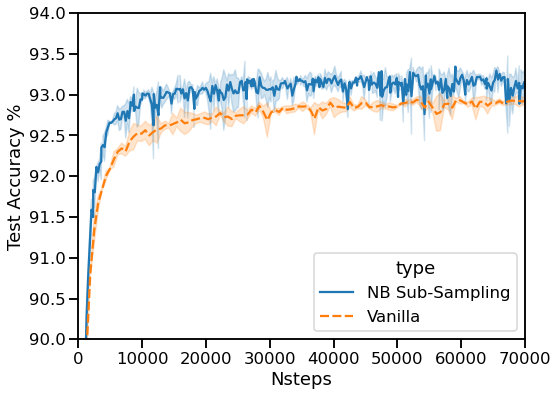

In [5]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.lineplot(data=df, x="nsteps", y="test_acc", style="type", hue="type", ax=ax, ci="sd")
g.set(ylim=[90, 94], xlim=[0, 70000])
g.set(ylabel="Test Accuracy %", xlabel="Nsteps")
fig.savefig("figures/nb_test_acc.jpg")

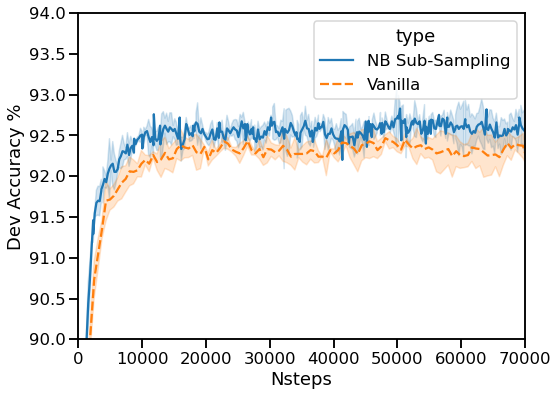

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
g = sns.lineplot(data=df, x="nsteps", y="dev_acc", style="type", hue="type", ax=ax, ci="sd")
g.set(ylim=[90, 94], xlim=[0, 70000])
g.set(ylabel="Dev Accuracy %", xlabel="Nsteps")
fig.savefig("figures/nb_dev_acc.jpg")

In [7]:
df.mean_ngram_count.value_counts()

256.0    820
617.0    360
257.0     50
Name: mean_ngram_count, dtype: int64